In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from itertools import product

# Data setup (same as yours)
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Split data
train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# Parameter ranges
param_ranges = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2],
    'P': [0, 1],
    'D': [0, 1],
    'Q': [0, 1]
}
m = 4

# Store results
results = []
best_mae = float('inf')
best_rmse = float('inf')
best_mae_params = None
best_rmse_params = None

# Iterate over all combinations
for p, d, q, P, D, Q in product(param_ranges['p'], param_ranges['d'], param_ranges['q'],
                               param_ranges['P'], param_ranges['D'], param_ranges['Q']):
    try:
        # Fit SARIMA model
        model = SARIMAX(train_data['Net Profit'],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, m),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        fitted_model = model.fit(disp=False)

        # Forecast test period
        forecast = fitted_model.get_forecast(steps=len(test_data))
        predicted = forecast.predicted_mean

        # Calculate errors
        mae = mean_absolute_error(test_data['Net Profit'], predicted)
        rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], predicted))

        # Store results
        results.append({
            'order': (p, d, q),
            'seasonal_order': (P, D, Q, m),
            'MAE': mae,
            'RMSE': rmse
        })

        # Update best parameters
        if mae < best_mae:
            best_mae = mae
            best_mae_params = (p, d, q, P, D, Q)
        if rmse < best_rmse:
            best_rmse = rmse
            best_rmse_params = (p, d, q, P, D, Q)

        print(f"Order: {(p, d, q)}, Seasonal: {(P, D, Q, m)}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    except Exception as e:
        print(f"Order: {(p, d, q)}, Seasonal: {(P, D, Q, m)} failed - {str(e)}")
        continue

# Print best results
print("\nBest MAE:")
print(f"Parameters: order={best_mae_params[:3]}, seasonal_order={best_mae_params[3:]+(m,)}")
print(f"MAE: {best_mae:.2f} Rs. Cr.")

print("\nBest RMSE:")
print(f"Parameters: order={best_rmse_params[:3]}, seasonal_order={best_rmse_params[3:]+(m,)}")
print(f"RMSE: {best_rmse:.2f} Rs. Cr.")

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 11500.00, RMSE: 11528.83
Order: (0, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 8824.57, RMSE: 9401.37
Order: (0, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1851.00, RMSE: 2233.32
Order: (0, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1947.48, RMSE: 2309.89


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 842.81, RMSE: 1352.12
Order: (0, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 828.35, RMSE: 1159.37
Order: (0, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1972.55, RMSE: 2323.19
Order: (0, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1851.04, RMSE: 2211.15
Order: (0, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 10947.15, RMSE: 11111.32
Order: (0, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 8708.25, RMSE: 9234.44
Order: (0, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1760.59, RMSE: 2178.14
Order: (0, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 1984.72, RMSE: 2353.69


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 888.48, RMSE: 1422.20
Order: (0, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 830.04, RMSE: 1168.41
Order: (0, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 2006.68, RMSE: 2344.52
Order: (0, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1824.86, RMSE: 2191.00
Order: (0, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 9429.92, RMSE: 10230.30


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 8081.60, RMSE: 8611.02
Order: (0, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1773.36, RMSE: 2101.54
Order: (0, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 1956.95, RMSE: 2329.24


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 837.09, RMSE: 1340.71


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order: (0, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 824.94, RMSE: 1190.60
Order: (0, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 2014.27, RMSE: 2335.02


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (0, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1771.71, RMSE: 2146.30
Order: (0, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 891.00, RMSE: 1171.03
Order: (0, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 880.71, RMSE: 1151.19
Order: (0, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 855.86, RMSE: 1347.79
Order: (0, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 674.15, RMSE: 1035.91
Order: (0, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 867.96, RMSE: 1130.59


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 835.61, RMSE: 1111.27
Order: (0, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 959.22, RMSE: 1320.63
Order: (0, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 909.21, RMSE: 1282.75
Order: (0, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1356.68, RMSE: 1582.60
Order: (0, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1173.83, RMSE: 1419.53


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 906.67, RMSE: 1390.75
Order: (0, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 1122.66, RMSE: 1403.38
Order: (0, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1343.16, RMSE: 1561.55
Order: (0, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1157.25, RMSE: 1397.72


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 1017.04, RMSE: 1389.21
Order: (0, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1074.96, RMSE: 1425.38
Order: (0, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 1360.11, RMSE: 1585.72


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1355.71, RMSE: 1587.52
Order: (0, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 875.54, RMSE: 1363.77
Order: (0, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1051.29, RMSE: 1405.95


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1366.05, RMSE: 1585.21
Order: (0, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1359.11, RMSE: 1587.31
Order: (0, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 1023.97, RMSE: 1383.16


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1029.26, RMSE: 1417.81
Order: (1, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 403.12, RMSE: 585.58
Order: (1, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 461.53, RMSE: 653.65
Order: (1, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1726.69, RMSE: 2128.79
Order: (1, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1770.84, RMSE: 2128.21


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 898.10, RMSE: 1430.04
Order: (1, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 832.56, RMSE: 1168.05
Order: (1, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1626.60, RMSE: 2004.75


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1606.82, RMSE: 1992.24
Order: (1, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 426.73, RMSE: 633.32
Order: (1, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 404.31, RMSE: 596.62
Order: (1, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1571.61, RMSE: 1980.32


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 859.69, RMSE: 1202.83
Order: (1, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 409.15, RMSE: 613.53


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 411.36, RMSE: 607.19
Order: (1, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 1314.04, RMSE: 1702.11


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1270.57, RMSE: 1678.50
Order: (1, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 418.62, RMSE: 632.26


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 442.64, RMSE: 663.05
Order: (1, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1700.67, RMSE: 2051.60
Order: (1, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 977.42, RMSE: 1378.46


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 405.40, RMSE: 615.13


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 426.28, RMSE: 648.37
Order: (1, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 1236.02, RMSE: 1605.34


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Lo

Order: (1, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1162.89, RMSE: 1563.42
Order: (1, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 1005.43, RMSE: 1288.72
Order: (1, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 990.74, RMSE: 1261.08
Order: (1, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 1201.18, RMSE: 1614.79
Order: (1, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 686.45, RMSE: 1027.12
Order: (1, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 988.28, RMSE: 1249.94
Order: (1, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 937.11, RMSE: 1208.47
Order: (1, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 889.77, RMSE: 1256.61
Order: (1, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 815.45, RMSE: 1191.20


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1357.56, RMSE: 1583.52
Order: (1, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1238.11, RMSE: 1482.93
Order: (1, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 876.57, RMSE: 1367.68


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 1089.39, RMSE: 1423.99
Order: (1, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1297.48, RMSE: 1520.26
Order: (1, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1213.09, RMSE: 1454.24


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 997.31, RMSE: 1365.53


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1034.82, RMSE: 1427.90
Order: (1, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 1473.04, RMSE: 1669.63
Order: (1, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1391.66, RMSE: 1601.23


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 906.60, RMSE: 1370.01
Order: (1, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1090.33, RMSE: 1317.18


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1432.26, RMSE: 1630.52
Order: (1, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1391.01, RMSE: 1601.51


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 996.82, RMSE: 1366.75
Order: (1, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1031.06, RMSE: 1419.92


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 376.31, RMSE: 502.74
Order: (2, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 369.80, RMSE: 536.48
Order: (2, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1669.80, RMSE: 2063.20
Order: (2, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1410.58, RMSE: 1749.11
Order: (2, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 381.47, RMSE: 473.22


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 387.07, RMSE: 484.35
Order: (2, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1533.85, RMSE: 1925.05
Order: (2, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1532.52, RMSE: 1921.26
Order: (2, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 429.72, RMSE: 639.74


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 396.01, RMSE: 590.04
Order: (2, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1617.32, RMSE: 2024.97
Order: (2, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 918.01, RMSE: 1310.95
Order: (2, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 797.06, RMSE: 1194.01


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 393.08, RMSE: 585.85
Order: (2, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 1219.43, RMSE: 1596.57


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1057.99, RMSE: 1459.36
Order: (2, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 378.82, RMSE: 566.23
Order: (2, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 453.32, RMSE: 658.44
Order: (2, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1608.36, RMSE: 2011.75


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 1014.13, RMSE: 1412.98
Order: (2, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 422.29, RMSE: 613.32


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 421.96, RMSE: 633.21
Order: (2, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 1339.88, RMSE: 1733.24


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1236.80, RMSE: 1613.48
Order: (2, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 1385.98, RMSE: 1592.37
Order: (2, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 1373.75, RMSE: 1578.13
Order: (2, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 1275.58, RMSE: 1725.88
Order: (2, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 854.58, RMSE: 1191.04
Order: (2, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 1339.10, RMSE: 1552.08


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 1325.20, RMSE: 1539.84
Order: (2, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 840.07, RMSE: 1163.83
Order: (2, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 843.50, RMSE: 1204.32
Order: (2, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1424.44, RMSE: 1628.57


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1366.86, RMSE: 1579.93
Order: (2, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 1539.23, RMSE: 1914.30
Order: (2, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 913.65, RMSE: 1282.80


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1378.12, RMSE: 1572.50
Order: (2, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1308.12, RMSE: 1512.19


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 1018.86, RMSE: 1385.87
Order: (2, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1037.69, RMSE: 1430.45


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 934.49, RMSE: 1213.77
Order: (2, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1070.65, RMSE: 1351.84


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 2198.49, RMSE: 2502.36
Order: (2, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1048.27, RMSE: 1322.92


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Lo

Order: (2, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1128.61, RMSE: 1391.90
Order: (2, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1003.67, RMSE: 1409.45


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Lo

Order: (2, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 1013.14, RMSE: 1380.92


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order: (2, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1027.46, RMSE: 1416.65

Best MAE:
Parameters: order=(2, 0, 0), seasonal_order=(0, 0, 1, 4)
MAE: 369.80 Rs. Cr.

Best RMSE:
Parameters: order=(2, 0, 0), seasonal_order=(1, 0, 0, 4)
RMSE: 473.22 Rs. Cr.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from itertools import product

# Data setup
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Split data
train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# Parameter ranges
param_ranges = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2],
    'P': [0, 1],
    'D': [0, 1],
    'Q': [0, 1]
}
m = 4

# Store results
results = []
best_mae = float('inf')
best_rmse = float('inf')
best_params = None

# Iterate over all combinations
for p, d, q, P, D, Q in product(param_ranges['p'], param_ranges['d'], param_ranges['q'],
                               param_ranges['P'], param_ranges['D'], param_ranges['Q']):
    try:
        # Fit SARIMA model
        model = SARIMAX(train_data['Net Profit'],
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, m),
                        enforce_stationarity=False,
                        enforce_invertibility=False)
        fitted_model = model.fit(disp=False)

        # Forecast test period
        forecast = fitted_model.get_forecast(steps=len(test_data))
        predicted = forecast.predicted_mean

        # Calculate errors
        mae = mean_absolute_error(test_data['Net Profit'], predicted)
        rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], predicted))

        # Store results
        results.append({
            'order': (p, d, q),
            'seasonal_order': (P, D, Q, m),
            'MAE': mae,
            'RMSE': rmse
        })

        # Update best parameters (MAE as primary, RMSE as tiebreaker)
        if mae < best_mae or (mae == best_mae and rmse < best_rmse):
            best_mae = mae
            best_rmse = rmse
            best_params = (p, d, q, P, D, Q)

        print(f"Order: {(p, d, q)}, Seasonal: {(P, D, Q, m)}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    except Exception as e:
        print(f"Order: {(p, d, q)}, Seasonal: {(P, D, Q, m)} failed - {str(e)}")
        continue

# Print the best result
print("\nBest Model (Lowest MAE, with RMSE as tiebreaker):")
print(f"Parameters: order={best_params[:3]}, seasonal_order={best_params[3:]+(m,)}")
print(f"MAE: {best_mae:.2f} Rs. Cr.")
print(f"RMSE: {best_rmse:.2f} Rs. Cr.")

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 11500.00, RMSE: 11528.83
Order: (0, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 8824.57, RMSE: 9401.37
Order: (0, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1851.00, RMSE: 2233.32
Order: (0, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1947.48, RMSE: 2309.89
Order: (0, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 842.81, RMSE: 1352.12
Order: (0, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 828.35, RMSE: 1159.37
Order: (0, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1972.55, RMSE: 2323.19
Order: (0, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1851.04, RMSE: 2211.15
Order: (0, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 10947.15, RMSE: 11111.32


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 8708.25, RMSE: 9234.44
Order: (0, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1760.59, RMSE: 2178.14
Order: (0, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 1984.72, RMSE: 2353.69


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 888.48, RMSE: 1422.20


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (0, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 830.04, RMSE: 1168.41
Order: (0, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 2006.68, RMSE: 2344.52
Order: (0, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1824.86, RMSE: 2191.00
Order: (0, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 9429.92, RMSE: 10230.30


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 8081.60, RMSE: 8611.02
Order: (0, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1773.36, RMSE: 2101.54
Order: (0, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 1956.95, RMSE: 2329.24


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 837.09, RMSE: 1340.71


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Lo

Order: (0, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 824.94, RMSE: 1190.60
Order: (0, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 2014.27, RMSE: 2335.02
Order: (0, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1771.71, RMSE: 2146.30
Order: (0, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 891.00, RMSE: 1171.03
Order: (0, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 880.71, RMSE: 1151.19
Order: (0, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 855.86, RMSE: 1347.79
Order: (0, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 674.15, RMSE: 1035.91
Order: (0, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 867.96, RMSE: 1130.59


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 835.61, RMSE: 1111.27
Order: (0, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 959.22, RMSE: 1320.63
Order: (0, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 909.21, RMSE: 1282.75
Order: (0, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1356.68, RMSE: 1582.60
Order: (0, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1173.83, RMSE: 1419.53


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 906.67, RMSE: 1390.75
Order: (0, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 1122.66, RMSE: 1403.38
Order: (0, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1343.16, RMSE: 1561.55


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1157.25, RMSE: 1397.72
Order: (0, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 1017.04, RMSE: 1389.21
Order: (0, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1074.96, RMSE: 1425.38


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 1360.11, RMSE: 1585.72
Order: (0, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1355.71, RMSE: 1587.52
Order: (0, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 875.54, RMSE: 1363.77
Order: (0, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1051.29, RMSE: 1405.95


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1366.05, RMSE: 1585.21
Order: (0, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1359.11, RMSE: 1587.31
Order: (0, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 1023.97, RMSE: 1383.16


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (0, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1029.26, RMSE: 1417.81
Order: (1, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 403.12, RMSE: 585.58
Order: (1, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 461.53, RMSE: 653.65
Order: (1, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1726.69, RMSE: 2128.79
Order: (1, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1770.84, RMSE: 2128.21


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 898.10, RMSE: 1430.04
Order: (1, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 832.56, RMSE: 1168.05
Order: (1, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1626.60, RMSE: 2004.75


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1606.82, RMSE: 1992.24
Order: (1, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 426.73, RMSE: 633.32
Order: (1, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 404.31, RMSE: 596.62
Order: (1, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1571.61, RMSE: 1980.32


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 859.69, RMSE: 1202.83
Order: (1, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 409.15, RMSE: 613.53


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 411.36, RMSE: 607.19
Order: (1, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 1314.04, RMSE: 1702.11
Order: (1, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1270.57, RMSE: 1678.50


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 418.62, RMSE: 632.26
Order: (1, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 442.64, RMSE: 663.05
Order: (1, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1700.67, RMSE: 2051.60


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 977.42, RMSE: 1378.46
Order: (1, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 405.40, RMSE: 615.13


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 426.28, RMSE: 648.37
Order: (1, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 1236.02, RMSE: 1605.34


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1162.89, RMSE: 1563.42
Order: (1, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 1005.43, RMSE: 1288.72
Order: (1, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 990.74, RMSE: 1261.08
Order: (1, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 1201.18, RMSE: 1614.79
Order: (1, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 686.45, RMSE: 1027.12
Order: (1, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 988.28, RMSE: 1249.94


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 937.11, RMSE: 1208.47
Order: (1, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 889.77, RMSE: 1256.61
Order: (1, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 815.45, RMSE: 1191.20


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1357.56, RMSE: 1583.52
Order: (1, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1238.11, RMSE: 1482.93
Order: (1, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 876.57, RMSE: 1367.68


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 1089.39, RMSE: 1423.99
Order: (1, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1297.48, RMSE: 1520.26
Order: (1, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1213.09, RMSE: 1454.24


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (1, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 997.31, RMSE: 1365.53
Order: (1, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1034.82, RMSE: 1427.90


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 1473.04, RMSE: 1669.63
Order: (1, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1391.66, RMSE: 1601.23
Order: (1, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 906.60, RMSE: 1370.01
Order: (1, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1090.33, RMSE: 1317.18
Order: (1, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1432.26, RMSE: 1630.52
Order: (1, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1391.01, RMSE: 1601.51


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (1, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 996.82, RMSE: 1366.75
Order: (1, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1031.06, RMSE: 1419.92
Order: (2, 0, 0), Seasonal: (0, 0, 0, 4), MAE: 376.31, RMSE: 502.74


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 0), Seasonal: (0, 0, 1, 4), MAE: 369.80, RMSE: 536.48
Order: (2, 0, 0), Seasonal: (0, 1, 0, 4), MAE: 1669.80, RMSE: 2063.20
Order: (2, 0, 0), Seasonal: (0, 1, 1, 4), MAE: 1410.58, RMSE: 1749.11
Order: (2, 0, 0), Seasonal: (1, 0, 0, 4), MAE: 381.47, RMSE: 473.22
Order: (2, 0, 0), Seasonal: (1, 0, 1, 4), MAE: 387.07, RMSE: 484.35


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 0), Seasonal: (1, 1, 0, 4), MAE: 1533.85, RMSE: 1925.05
Order: (2, 0, 0), Seasonal: (1, 1, 1, 4), MAE: 1532.52, RMSE: 1921.26
Order: (2, 0, 1), Seasonal: (0, 0, 0, 4), MAE: 429.72, RMSE: 639.74


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (0, 0, 1, 4), MAE: 396.01, RMSE: 590.04
Order: (2, 0, 1), Seasonal: (0, 1, 0, 4), MAE: 1617.32, RMSE: 2024.97
Order: (2, 0, 1), Seasonal: (0, 1, 1, 4), MAE: 918.01, RMSE: 1310.95
Order: (2, 0, 1), Seasonal: (1, 0, 0, 4), MAE: 797.06, RMSE: 1194.01


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (1, 0, 1, 4), MAE: 393.08, RMSE: 585.85
Order: (2, 0, 1), Seasonal: (1, 1, 0, 4), MAE: 1219.43, RMSE: 1596.57


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 1), Seasonal: (1, 1, 1, 4), MAE: 1057.99, RMSE: 1459.36
Order: (2, 0, 2), Seasonal: (0, 0, 0, 4), MAE: 378.82, RMSE: 566.23


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 0, 2), Seasonal: (0, 0, 1, 4), MAE: 453.32, RMSE: 658.44
Order: (2, 0, 2), Seasonal: (0, 1, 0, 4), MAE: 1608.36, RMSE: 2011.75
Order: (2, 0, 2), Seasonal: (0, 1, 1, 4), MAE: 1014.13, RMSE: 1412.98


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 2), Seasonal: (1, 0, 0, 4), MAE: 422.29, RMSE: 613.32
Order: (2, 0, 2), Seasonal: (1, 0, 1, 4), MAE: 421.96, RMSE: 633.21


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 0, 2), Seasonal: (1, 1, 0, 4), MAE: 1339.88, RMSE: 1733.24
Order: (2, 0, 2), Seasonal: (1, 1, 1, 4), MAE: 1236.80, RMSE: 1613.48
Order: (2, 1, 0), Seasonal: (0, 0, 0, 4), MAE: 1385.98, RMSE: 1592.37
Order: (2, 1, 0), Seasonal: (0, 0, 1, 4), MAE: 1373.75, RMSE: 1578.13


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 0), Seasonal: (0, 1, 0, 4), MAE: 1275.58, RMSE: 1725.88
Order: (2, 1, 0), Seasonal: (0, 1, 1, 4), MAE: 854.58, RMSE: 1191.04
Order: (2, 1, 0), Seasonal: (1, 0, 0, 4), MAE: 1339.10, RMSE: 1552.08
Order: (2, 1, 0), Seasonal: (1, 0, 1, 4), MAE: 1325.20, RMSE: 1539.84
Order: (2, 1, 0), Seasonal: (1, 1, 0, 4), MAE: 840.07, RMSE: 1163.83
Order: (2, 1, 0), Seasonal: (1, 1, 1, 4), MAE: 843.50, RMSE: 1204.32
Order: (2, 1, 1), Seasonal: (0, 0, 0, 4), MAE: 1424.44, RMSE: 1628.57


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 1), Seasonal: (0, 0, 1, 4), MAE: 1366.86, RMSE: 1579.93
Order: (2, 1, 1), Seasonal: (0, 1, 0, 4), MAE: 1539.23, RMSE: 1914.30
Order: (2, 1, 1), Seasonal: (0, 1, 1, 4), MAE: 913.65, RMSE: 1282.80


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 1), Seasonal: (1, 0, 0, 4), MAE: 1378.12, RMSE: 1572.50
Order: (2, 1, 1), Seasonal: (1, 0, 1, 4), MAE: 1308.12, RMSE: 1512.19


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 1), Seasonal: (1, 1, 0, 4), MAE: 1018.86, RMSE: 1385.87
Order: (2, 1, 1), Seasonal: (1, 1, 1, 4), MAE: 1037.69, RMSE: 1430.45


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 2), Seasonal: (0, 0, 0, 4), MAE: 934.49, RMSE: 1213.77
Order: (2, 1, 2), Seasonal: (0, 0, 1, 4), MAE: 1070.65, RMSE: 1351.84


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 2), Seasonal: (0, 1, 0, 4), MAE: 2198.49, RMSE: 2502.36


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order: (2, 1, 2), Seasonal: (0, 1, 1, 4), MAE: 1048.27, RMSE: 1322.92
Order: (2, 1, 2), Seasonal: (1, 0, 0, 4), MAE: 1128.61, RMSE: 1391.90


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Py

Order: (2, 1, 2), Seasonal: (1, 0, 1, 4), MAE: 1003.67, RMSE: 1409.45
Order: (2, 1, 2), Seasonal: (1, 1, 0, 4), MAE: 1013.14, RMSE: 1380.92


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


Order: (2, 1, 2), Seasonal: (1, 1, 1, 4), MAE: 1027.46, RMSE: 1416.65

Best Model (Lowest MAE, with RMSE as tiebreaker):
Parameters: order=(2, 0, 0), seasonal_order=(0, 0, 1, 4)
MAE: 369.80 Rs. Cr.
RMSE: 536.48 Rs. Cr.


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RANDOM SEARCH (NOT EFFICIENT)

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation (same as before)
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# 2. Define Parameter Ranges
param_ranges = {
    'p': [0, 1, 2],        # Non-seasonal AR
    'd': [0, 1],          # Non-seasonal differencing
    'q': [0, 1, 2],        # Non-seasonal MA
    'P': [0, 1],          # Seasonal AR
    'D': [0, 1],          # Seasonal differencing
    'Q': [0, 1]           # Seasonal MA
}
m = 4  # Quarterly seasonality
n_trials = 20  # Number of random combinations to try

# 3. Random Search Function
def random_sarima_params(param_ranges):
    return {
        'order': (
            random.choice(param_ranges['p']),
            random.choice(param_ranges['d']),
            random.choice(param_ranges['q'])
        ),
        'seasonal_order': (
            random.choice(param_ranges['P']),
            random.choice(param_ranges['D']),
            random.choice(param_ranges['Q']),
            m
        )
    }

# 4. Run Random Search
results = []
print(f"Testing {n_trials} random parameter combinations...")

for _ in range(n_trials):
    params = random_sarima_params(param_ranges)
    order = params['order']
    seasonal_order = params['seasonal_order']
    
    try:
        # Fit model
        model = SARIMAX(train_data['Net Profit'],
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        results_fit = model.fit(disp=False)
        
        # Forecast
        forecast = results_fit.get_forecast(steps=len(test_data))
        predicted = forecast.predicted_mean
        
        # Metrics
        aic = results_fit.aic
        mae = mean_absolute_error(test_data['Net Profit'], predicted)
        rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], predicted))
        
        results.append({
            'order': order,
            'seasonal_order': seasonal_order,
            'AIC': aic,
            'MAE': mae,
            'RMSE': rmse
        })
        
        print(f"Order: {order}, Seasonal: {seasonal_order}")
        print(f"AIC: {aic:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")
        
    except Exception as e:
        print(f"Order: {order}, Seasonal: {seasonal_order} - Failed: {str(e)}")

# 5. Find Best Models
best_aic = min(results, key=lambda x: x['AIC'])
best_mae = min(results, key=lambda x: x['MAE'])
best_rmse = min(results, key=lambda x: x['RMSE'])

# 6. Print Results
print("\n=== Best Models ===")
print("\nBest AIC Model:")
print(f"Order: {best_aic['order']}, Seasonal: {best_aic['seasonal_order']}")
print(f"AIC: {best_aic['AIC']:.2f}, MAE: {best_aic['MAE']:.2f}, RMSE: {best_aic['RMSE']:.2f}")

print("\nBest MAE Model:")
print(f"Order: {best_mae['order']}, Seasonal: {best_mae['seasonal_order']}")
print(f"AIC: {best_mae['AIC']:.2f}, MAE: {best_mae['MAE']:.2f}, RMSE: {best_mae['RMSE']:.2f}")

print("\nBest RMSE Model:")
print(f"Order: {best_rmse['order']}, Seasonal: {best_rmse['seasonal_order']}")
print(f"AIC: {best_rmse['AIC']:.2f}, MAE: {best_rmse['MAE']:.2f}, RMSE: {best_rmse['RMSE']:.2f}")

# 7. Forecast 2025 with Best MAE Model
best_model = SARIMAX(train_data['Net Profit'],
                    order=best_mae['order'],
                    seasonal_order=best_mae['seasonal_order'],
                    enforce_stationarity=False,
                    enforce_invertibility=False)
best_results = best_model.fit(disp=False)

future_forecast = best_results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

print("\n2025 Forecast with Best MAE Model:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

Testing 20 random parameter combinations...
Order: (0, 0, 1), Seasonal: (1, 0, 1, 4)
AIC: 518.20, MAE: 830.04, RMSE: 1168.41
Order: (1, 1, 1), Seasonal: (1, 0, 1, 4)
AIC: 498.15, MAE: 1213.09, RMSE: 1454.24
Order: (0, 1, 1), Seasonal: (1, 1, 0, 4)
AIC: 466.18, MAE: 1017.04, RMSE: 1389.21
Order: (1, 0, 1), Seasonal: (0, 0, 0, 4)
AIC: 570.84, MAE: 426.73, RMSE: 633.32
Order: (2, 1, 2), Seasonal: (0, 1, 0, 4)
AIC: 486.98, MAE: 2198.49, RMSE: 2502.36
Order: (0, 0, 0), Seasonal: (0, 0, 1, 4)
AIC: 633.63, MAE: 8824.57, RMSE: 9401.37
Order: (0, 1, 2), Seasonal: (0, 0, 1, 4)
AIC: 480.40, MAE: 1355.71, RMSE: 1587.52
Order: (0, 0, 2), Seasonal: (0, 1, 1, 4)
AIC: 443.04, MAE: 1956.95, RMSE: 2329.24
Order: (1, 0, 2), Seasonal: (0, 1, 0, 4)
AIC: 510.33, MAE: 1700.67, RMSE: 2051.60
Order: (2, 1, 0), Seasonal: (0, 0, 0, 4)
AIC: 564.17, MAE: 1385.98, RMSE: 1592.37
Order: (0, 1, 2), Seasonal: (0, 1, 0, 4)
AIC: 492.38, MAE: 875.54, RMSE: 1363.77
Order: (1, 1, 2), Seasonal: (1, 1, 0, 4)
AIC: 450.14, MAE:

BAYESIAN OPTIMIZATION

In [8]:
%pip install scikit-optimize

  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached pyaml-25.1.0-py3-none-any.whl.metadata (12 kB)
Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
Using cached pyaml-25.1.0-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import skopt
print(skopt.__version__)

0.10.2


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args
import warnings
warnings.filterwarnings('ignore')

# 1. Data Preparation
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

train_data = df.loc[:'2022-12-31']
test_data = df.loc['2023-03-31':]

# 2. Define Parameter Space
space = [
    Integer(0, 2, name='p'),  # Non-seasonal AR
    Integer(0, 1, name='d'),  # Non-seasonal differencing
    Integer(0, 2, name='q'),  # Non-seasonal MA
    Integer(0, 1, name='P'),  # Seasonal AR
    Integer(0, 1, name='D'),  # Seasonal differencing
    Integer(0, 1, name='Q')   # Seasonal MA
]
m = 4  # Quarterly seasonality

# 3. Objective Function
@use_named_args(space)
def objective(p, d, q, P, D, Q):
    try:
        order = (p, d, q)
        seasonal_order = (P, D, Q, m)
        
        # Fit SARIMA
        model = SARIMAX(train_data['Net Profit'],
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        results = model.fit(disp=False)
        
        # Forecast
        forecast = results.get_forecast(steps=len(test_data))
        predicted = forecast.predicted_mean
        
        # Return MAE to minimize
        mae = mean_absolute_error(test_data['Net Profit'], predicted)
        return mae
    
    except:
        # Return a large value if model fails
        return 1e6

# 4. Run Bayesian Optimization
n_calls = 20  # Number of iterations
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=n_calls,
    random_state=42,  # For reproducibility
    verbose=True
)

# 5. Extract Best Parameters
best_params = result.x
best_order = (best_params[0], best_params[1], best_params[2])
best_seasonal_order = (best_params[3], best_params[4], best_params[5], m)
best_mae = result.fun

# 6. Evaluate Best Model with All Metrics
model = SARIMAX(train_data['Net Profit'],
                order=best_order,
                seasonal_order=best_seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

forecast = results.get_forecast(steps=len(test_data))
predicted = forecast.predicted_mean
aic = results.aic
mae = mean_absolute_error(test_data['Net Profit'], predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], predicted))

# 7. Print Results
print("\n=== Best Model from Bayesian Optimization ===")
print(f"Order: {best_order}, Seasonal: {best_seasonal_order}")
print(f"AIC: {aic:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 8. Forecast 2025
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

print("\n2025 Forecast with Best Model:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2797
Function value obtained: 422.2915
Current minimum: 422.2915
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1042
Function value obtained: 832.5586
Current minimum: 422.2915
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.2517
Function value obtained: 1339.8836
Current minimum: 422.2915
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0833
Function value obtained: 906.6660
Current minimum: 422.2915
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1699
Function value obtained: 1157.2493
Current minimum: 422.2915
Iteration No:

MAE (Average Oops): 1956.95 Rs. Cr.
RMSE (Big Oops): 2329.24 Rs. Cr.


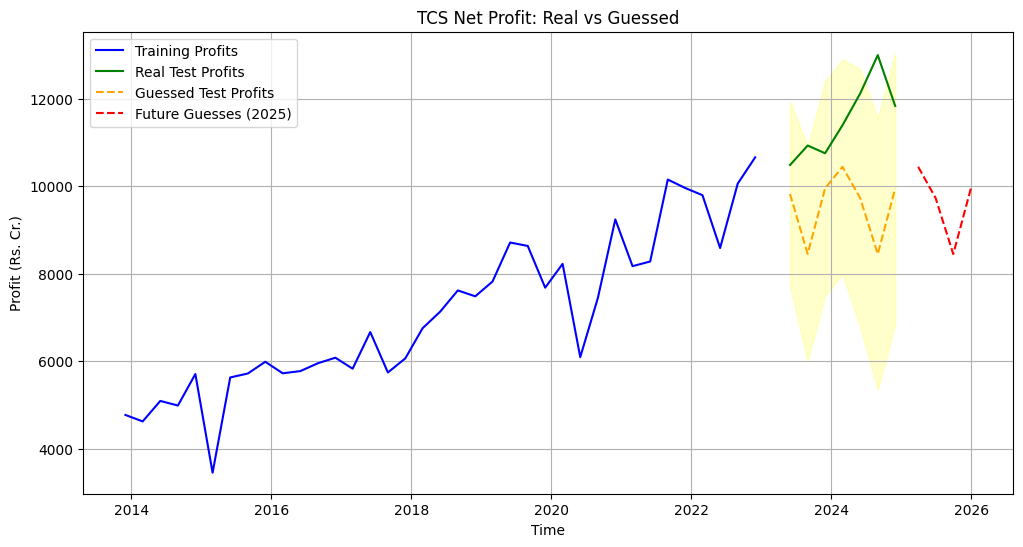


Guessed Profits for 2025:
Mar 25: 10442.66 Rs. Cr.
Jun 25: 9730.61 Rs. Cr.
Sep 25: 8450.05 Rs. Cr.
Dec 25: 9950.16 Rs. Cr.


In [12]:
# Step 1: Get our magic toy box ready
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 2: TCS candy profits list
data = {
    'Quarter': ['Dec 13', 'Mar 14', 'Jun 14', 'Sep 14', 'Dec 14', 'Mar 15', 'Jun 15', 'Sep 15', 
                'Dec 15', 'Mar 16', 'Jun 16', 'Sep 16', 'Dec 16', 'Mar 17', 'Jun 17', 'Sep 17', 
                'Dec 17', 'Mar 18', 'Jun 18', 'Sep 18', 'Dec 18', 'Mar 19', 'Jun 19', 'Sep 19', 
                'Dec 19', 'Mar 20', 'Jun 20', 'Sep 20', 'Dec 20', 'Mar 21', 'Jun 21', 'Sep 21', 
                'Dec 21', 'Mar 22', 'Jun 22', 'Sep 22', 'Dec 22', 'Mar 23', 'Jun 23', 'Sep 23', 
                'Dec 23', 'Mar 24', 'Jun 24', 'Sep 24', 'Dec 24'],
    'Net Profit': [4776.76, 4628.52, 5096.87, 4991.68, 5711.15, 3457.26, 5633.0, 5723.0, 
                   5991.0, 5728.0, 5778.0, 5958.0, 6084.0, 5833.0, 6670.0, 5746.0, 
                   6069.0, 6756.0, 7136.0, 7620.0, 7486.0, 7823.0, 8714.0, 8636.0, 
                   7683.0, 8227.0, 6096.0, 7448.0, 9242.0, 8174.0, 8281.0, 10152.0, 
                   9959.0, 9795.0, 8588.0, 10059.0, 10659.0, 9800.0, 10484.0, 10929.0, 
                   10753.0, 11393.0, 12115.0, 12994.0, 11832.0]
}

# Step 3: Neat table with time
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 4: Split training (Dec 13 - Dec 22) and testing (Mar 23 - Dec 24)
train_data = df.loc[:'2022-12-31']  # 37 quarters
test_data = df.loc['2023-03-31':]   # 8 quarters

# Step 5: Try a simpler SARIMA toy: (1,1,0)(1,1,0,4)
model = SARIMAX(train_data['Net Profit'], 
                order=(0, 0, 2),              # AR=1, I=1, No MA
                seasonal_order=(0, 1, 1, 4),  # Seasonal AR=1, Seasonal I=1, No Seasonal MA
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()  # Teach it

# Step 6: Guess the test period
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 7: Check the “oops” scores
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Average Oops): {mae:.2f} Rs. Cr.")
print(f"RMSE (Big Oops): {rmse:.2f} Rs. Cr.")

# Step 8: Guess 2025 for fun
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 9: Draw it!
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Profits', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Real Test Profits', color='green')
plt.plot(test_data.index, test_predicted, label='Guessed Test Profits', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Future Guesses (2025)', color='red', linestyle='--')
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.title('TCS Net Profit: Real vs Guessed')
plt.xlabel('Time')
plt.ylabel('Profit (Rs. Cr.)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Show 2025 guesses
print("\nGuessed Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f} Rs. Cr.")